In [1]:
#Data description

'''
Columns description
url contains the url of the restaurant in the zomato website
address contains the address of the restaurant in Bengaluru
name contains the name of the restaurant
online_order whether online ordering is available in the restaurant or not
book_table table book option available or not
rate contains the overall rating of the restaurant out of 5
votes contains total number of rating for the restaurant as of the above mentioned date
phone contains the phone number of the restaurant
location contains the neighborhood in which the restaurant is located
rest_type restaurant type
dish_liked dishes people liked in the restaurant
cuisines food styles, separated by comma
approx_cost(for two people) contains the approximate cost for meal for two people
reviews_list list of tuples containing reviews for the restaurant, each tuple
menu_item contains list of menus available in the restaurant
listed_in(type) type of meal
listed_in(city) contains the neighborhood in which the restaurant is listed

'''

'\nColumns description\nurl contains the url of the restaurant in the zomato website\naddress contains the address of the restaurant in Bengaluru\nname contains the name of the restaurant\nonline_order whether online ordering is available in the restaurant or not\nbook_table table book option available or not\nrate contains the overall rating of the restaurant out of 5\nvotes contains total number of rating for the restaurant as of the above mentioned date\nphone contains the phone number of the restaurant\nlocation contains the neighborhood in which the restaurant is located\nrest_type restaurant type\ndish_liked dishes people liked in the restaurant\ncuisines food styles, separated by comma\napprox_cost(for two people) contains the approximate cost for meal for two people\nreviews_list list of tuples containing reviews for the restaurant, each tuple\nmenu_item contains list of menus available in the restaurant\nlisted_in(type) type of meal\nlisted_in(city) contains the neighborhood i

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [3]:
con= sqlite3.connect(r'/Users/ilkaymueller/Documents/GitHub/Data_Analysis_Projects/Zomato Data/zomato_rawdata.sqlite')

In [4]:
df = pd.read_sql_query('SELECT * FROM Users' ,con)

In [5]:
df.head()

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
2      2  https://www.zomato.com/SanchurroBangalore?cont...   
3      3  https://www.zomato.com/bangalore/addhuri-udupi...   
4      4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [6]:
df.shape

(51717, 18)

# Cleaning the data

In [7]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.isnull().sum()/len(df)*100 #will find the pct

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [9]:
#not going to drop half of it


In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df['rate'].value_counts()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [12]:
df['rate'].replace(('NEW','-','None', ' None'), np.nan, inplace=True)

In [13]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

# Transformation

In [14]:
'3.8/5'.split('/')[0]

'3.8'

In [15]:
type('3.8/5'.split('/')[0])

str

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         41665 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

In [17]:
#almost all are object aka string

In [18]:
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)== str else x)

In [19]:
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [20]:
df.info()  #made it float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        51717 non-null  int64  
 1   url                          51717 non-null  object 
 2   address                      51717 non-null  object 
 3   name                         51717 non-null  object 
 4   online_order                 51717 non-null  object 
 5   book_table                   51717 non-null  object 
 6   rate                         41665 non-null  float64
 7   votes                        51717 non-null  int64  
 8   phone                        50509 non-null  object 
 9   location                     51696 non-null  object 
 10  rest_type                    51490 non-null  object 
 11  dish_liked                   23639 non-null  object 
 12  cuisines                     51672 non-null  object 
 13  approx_cost(for 

In [21]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Do online order has an effect on rating?

In [22]:
pivot = pd.crosstab(df['rate'], df['online_order'])
pivot

online_order    No   Yes
rate                    
1.8              5     0
2.0             11     0
2.1              9    15
2.2             10    16
2.3             29    22
2.4             36    34
2.5             38    63
2.6             83   177
2.7            141   166
2.8            224   376
2.9            314   488
3.0            439   584
3.1            587   974
3.2            829  1044
3.3           1137  1173
3.4           1024  1452
3.5           1090  1694
3.6           1090  2226
3.7           1172  2649
3.8           1147  2726
3.9           1017  2955
4.0            874  2309
4.1            843  2105
4.2            648  1536
4.3            692  1001
4.4            374   773
4.5            297   359
4.6            140   160
4.7            113    54
4.8             34    32
4.9             12    43

<AxesSubplot:xlabel='rate'>

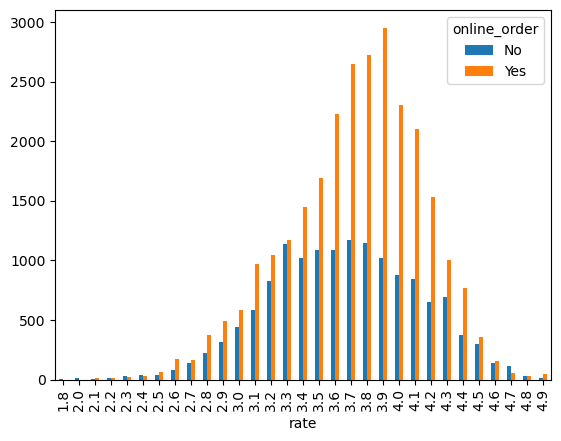

In [23]:
pivot.plot(kind= 'bar')

<AxesSubplot:xlabel='rate'>

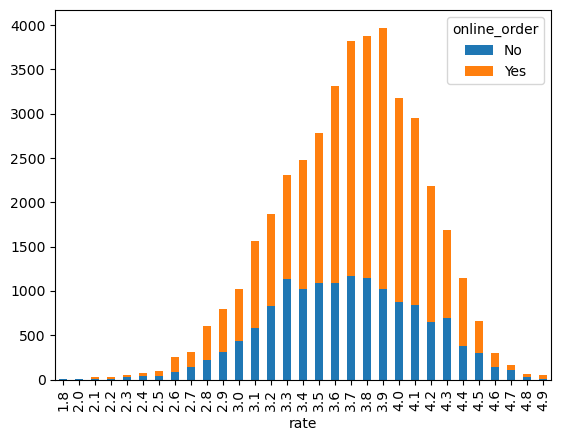

In [24]:
#make it look nicer
pivot.plot(kind= 'bar', stacked = True)

In [25]:
#looks like people who ordered their food online are more likely to leave rating. 
#still going to check it with normalized values.

# Normalizing and checking again

In [26]:
# all kind of orders, yes and no together 
a = pivot.sum(axis=1).astype(float)
a

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [27]:
normalized_pivot = pivot.div(a, axis=0) 
normalized_pivot

online_order        No       Yes
rate                            
1.8           1.000000  0.000000
2.0           1.000000  0.000000
2.1           0.375000  0.625000
2.2           0.384615  0.615385
2.3           0.568627  0.431373
2.4           0.514286  0.485714
2.5           0.376238  0.623762
2.6           0.319231  0.680769
2.7           0.459283  0.540717
2.8           0.373333  0.626667
2.9           0.391521  0.608479
3.0           0.429130  0.570870
3.1           0.376041  0.623959
3.2           0.442605  0.557395
3.3           0.492208  0.507792
3.4           0.413570  0.586430
3.5           0.391523  0.608477
3.6           0.328709  0.671291
3.7           0.306726  0.693274
3.8           0.296153  0.703847
3.9           0.256042  0.743958
4.0           0.274584  0.725416
4.1           0.285957  0.714043
4.2           0.296703  0.703297
4.3           0.408742  0.591258
4.4           0.326068  0.673932
4.5           0.452744  0.547256
4.6           0.466667  0.533333
4.7           0.676647  0.323353
4.8           0.515152  0.484848
4.9           0.218182  0.781818

<AxesSubplot:xlabel='rate'>

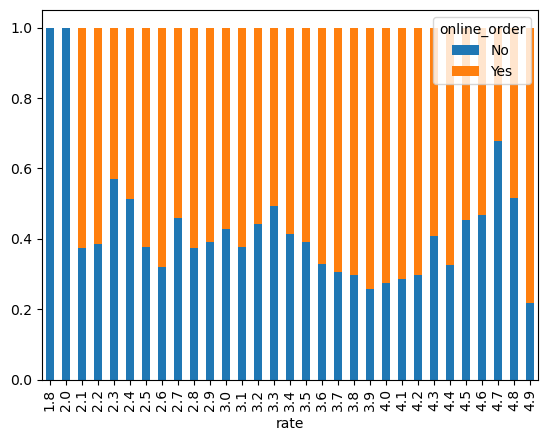

In [28]:
normalized_pivot.plot(kind= 'bar', stacked = True)

<AxesSubplot:xlabel='rate'>

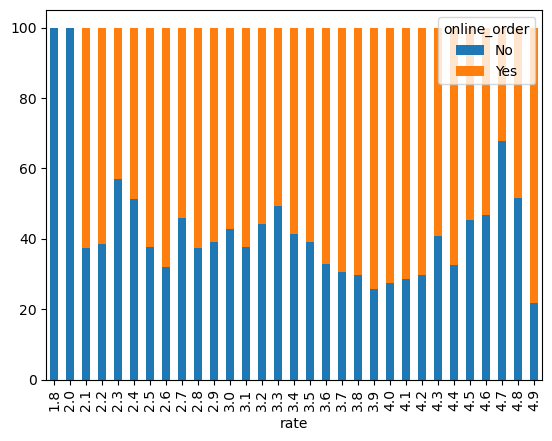

In [29]:
(normalized_pivot*100).plot(kind= 'bar', stacked = True,)

In [30]:
#looks like online order has a positive effect on rating regarding the ratings above 4. 

In [31]:
df.head()

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
2      2  https://www.zomato.com/SanchurroBangalore?cont...   
3      3  https://www.zomato.com/bangalore/addhuri-udupi...   
4      4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

# Reviews for certain restaurant types, NLP

I am going to work with one of the restaurant type only as the data is big. Applicable for all types if needed.

In [32]:
df['rest_type'].isnull().sum()

227

In [33]:
data = df.dropna(subset = ['rest_type'])

In [34]:
data['rest_type'].isnull().sum()

0

In [35]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [36]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [37]:
quick_bites_df

index                                                url  \
3          3  https://www.zomato.com/bangalore/addhuri-udupi...   
23        23  https://www.zomato.com/bangalore/my-tea-house-...   
26        26  https://www.zomato.com/bangalore/coffee-tindi-...   
31        31  https://www.zomato.com/bangalore/foodiction-1-...   
34        34  https://www.zomato.com/bangalore/faasos-banash...   
...      ...                                                ...   
51641  51641  https://www.zomato.com/bangalore/andhra-spices...   
51642  51642  https://www.zomato.com/bangalore/basaveshwara-...   
51643  51643  https://www.zomato.com/bangalore/new-ambur-bir...   
51644  51644  https://www.zomato.com/bangalore/punjabi-thadk...   
51645  51645  https://www.zomato.com/bangalore/raapchick-bro...   

                                                 address  \
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
23     224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...   
26     27th Cross Rd, Banashankari Stage II, Banashan...   
31     2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
...                                                  ...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   
51642  Nanjudeshwari complex, Oppsite Brookefield Mal...   
51643  AECS Layout, ITPL Main Road, Brookefield, Bang...   
51644  7/3, ASK Tower, Kundanahalli Gate, Next to Bat...   
51645  Opposite Brookefield Mall, Kundanhalli, Brooke...   

                         name online_order book_table  rate  votes  \
3       Addhuri Udupi Bhojana           No         No   3.7     88   
23               My Tea House          Yes         No   3.6     62   
26               Coffee Tindi          Yes         No   3.8     75   
31                 Foodiction          Yes         No   2.8    506   
34                     Faasos          Yes         No   4.2    415   
...                       ...          ...        ...   ...    ...   
51641           Andhra Spices           No         No   3.2      4   
51642  Basaveshwara Khanavali           No         No   NaN      0   
51643       New Ambur Biryani           No         No   NaN      0   
51644          Punjabi Thadka           No         No   NaN      0   
51645               Raapchick          Yes         No   3.6     49   

                                phone      location          rest_type  \
3                      +91 9620009302  Banashankari        Quick Bites   
23     080 65975430\r\n+91 7337733798  Banashankari  Quick Bites, Cafe   
26                     +91 9945758046  Banashankari  Cafe, Quick Bites   
31                     +91 9916107070  Banashankari        Quick Bites   
34                     +91 7700020020  Banashankari        Quick Bites   
...                               ...           ...                ...   
51641                            None   Brookefield        Quick Bites   
51642  +91 9740912864\n+91 7353747430   Brookefield        Quick Bites   
51643                  +91 9443087893   Brookefield        Quick Bites   
51644  +91 7338330336\n+91 9591568221   Brookefield        Quick Bites   
51645    080 41717785\n+91 9571153004   Brookefield        Quick Bites   

                                              dish_liked  \
3                                            Masala Dosa   
23                                       Pasta, Iced Tea   
26                                                  None   
31     Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34     Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
...                                                  ...   
51641                                               None   
51642                                               None   
51643                                               None   
51644                                               None   
51645                                            Burgers   

                              

In [38]:
quick_bites_df.shape

(20639, 18)

In [39]:
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [40]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x: x.lower())

/var/folders/p4/_ylldw792tx5lq22msk41v500000gn/T/ipykernel_82673/990775181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x: x.lower())


In [41]:
quick_bites_df['reviews_list']

3        [('rated 4.0', "rated\n  great food and proper...
23       [('rated 4.0', "rated\n  so, went here with fr...
26       [('rated 5.0', 'rated\n  please provide some e...
31       [('rated 1.0', "rated\n  worst restaurant ever...
34       [('rated 3.0', 'rated\n  not worth for the mon...
                               ...                        
51641    [('rated 2.0', "rated\n  food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('rated 5.0', "rated\n  i was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [42]:
from nltk import RegexpTokenizer

In [43]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [44]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [45]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [46]:
tokenizer.tokenize(quick_bites_df['reviews_list'][23])

['rated',
 'rated',
 'n',
 'so',
 'went',
 'here',
 'with',
 'friends',
 'for',
 'tea',
 'the',
 'ambience',
 'is',
 'striking',
 'to',
 'say',
 'the',
 'least',
 'the',
 'posters',
 'from',
 'tea',
 'gardens',
 'and',
 'a',
 'wide',
 'variety',
 'of',
 'tea',
 'stories',
 'in',
 'transparent',
 'bottles',
 'along',
 'with',
 'their',
 'description',
 'on',
 'the',
 'menu',
 'makes',
 'them',
 'all',
 'so',
 'tempting',
 'to',
 'try',
 'they',
 'have',
 'a',
 'umpteen',
 'varieties',
 'of',
 'teas',
 'from',
 'basic',
 'chai',
 'and',
 'lemon',
 'tea',
 'to',
 'variants',
 'like',
 'saffron',
 'and',
 'cranberry',
 'you',
 'name',
 'it',
 'they',
 'have',
 'it',
 'they',
 'also',
 'have',
 'some',
 'food',
 'to',
 'go',
 'with',
 'it',
 'but',
 'since',
 'i',
 'went',
 'there',
 'post',
 'lunch',
 'couldn',
 't',
 'try',
 'a',
 'quiet',
 'place',
 'on',
 'the',
 'main',
 'road',
 'perfect',
 'to',
 'hang',
 'out',
 'after',
 'work',
 'with',
 'friends',
 'or',
 'even',
 'family',
 'a',

In [47]:
sample = quick_bites_df[0:10000] #working with sample, too many words

In [48]:
sample.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [49]:
review_tokens = sample['reviews_list'].apply(tokenizer.tokenize)

In [50]:
review_tokens

3        [rated, rated, n, great, food, and, proper, ka...
23       [rated, rated, n, so, went, here, with, friend...
26       [rated, rated, n, please, provide, some, extra...
31       [rated, rated, n, worst, restaurant, ever, veg...
34       [rated, rated, n, not, worth, for, the, money,...
                               ...                        
25000    [rated, rated, n, being, a, loyal, customer, f...
25001    [rated, rated, n, it, was, good, visiting, the...
25007    [rated, rated, n, halal, tag, is, not, there, ...
25008    [rated, rated, n, i, x, x, x, x, x, x, x, x, m...
25009    [rated, rated, n, nit, tasted, like, mint, ric...
Name: reviews_list, Length: 10000, dtype: object

In [51]:
from nltk.corpus import stopwords

In [52]:
stop = stopwords.words('english')

In [53]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
#custom stop words

stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])

In [55]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [56]:
rev3 = review_tokens[3]
print(rev3)

['rated', 'rated', 'n', 'great', 'food', 'and', 'proper', 'karnataka', 'style', 'full', 'meals', 'been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'rated', 'rated', 'n', 'reached', 'the', 'place', 'at', 'pm', 'on', 'saturday', 'half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'what', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'the', 'taste', 'was', 'also', 'very', 'average', 'only', 'dosa', 'and', 'holige', 'were', 'good', 'there', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'the', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'had', 'to', 'call', 'them', 'repeatedly', 'rated', 'rated', 'n', 'had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [57]:
print([token for token in rev3 if token not in stop])

['great', 'food', 'proper', 'karnataka', 'style', 'full', 'meals', 'twice', 'fully', 'satisfied', 'give', 'stars', 'well', 'managed', 'reached', 'place', 'pm', 'saturday', 'half', 'items', 'menu', 'annoying', 'food', 'cold', 'taste', 'also', 'average', 'dosa', 'holige', 'good', 'people', 'restaurant', 'service', 'still', 'slow', 'waiters', 'standing', 'one', 'corner', 'talking', 'call', 'repeatedly', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'one', 'good', 'hotel', 'price', 'udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'cant', 'clean', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us', 'full', 'amount', 'lastly', 'u', 'r', 'ok', 'b', 'seated', 'random', 'people', 'adjust', 'table', 'mann

In [58]:
review_tokens_clean = review_tokens.apply(lambda each_rev: [token for token in each_rev if token not in stop])

In [59]:
review_tokens_clean

3        [great, food, proper, karnataka, style, full, ...
23       [went, friends, tea, ambience, striking, say, ...
26       [please, provide, extra, sambal, quantity, les...
31       [worst, restaurant, ever, veg, manchurian, wor...
34       [worth, money, pay, ambience, good, enough, se...
                               ...                        
25000    [loyal, customer, last, two, years, must, say,...
25001    [good, visiting, place, better, compared, hote...
25007    [halal, tag, food, could, haram, restaurants, ...
25008    [sucker, simple, south, indian, breakfast, pla...
25009    [nit, tasted, like, mint, rice, hint, chicken,...
Name: reviews_list, Length: 10000, dtype: object

In [60]:
type(review_tokens_clean)

pandas.core.series.Series

In [61]:
list_2d_tokens = list(review_tokens_clean)

In [62]:
list_2d_tokens  #list inside of a list

[['great',
  'food',
  'proper',
  'karnataka',
  'style',
  'full',
  'meals',
  'twice',
  'fully',
  'satisfied',
  'give',
  'stars',
  'well',
  'managed',
  'reached',
  'place',
  'pm',
  'saturday',
  'half',
  'items',
  'menu',
  'annoying',
  'food',
  'cold',
  'taste',
  'also',
  'average',
  'dosa',
  'holige',
  'good',
  'people',
  'restaurant',
  'service',
  'still',
  'slow',
  'waiters',
  'standing',
  'one',
  'corner',
  'talking',
  'call',
  'repeatedly',
  'good',
  'food',
  'served',
  'tasty',
  'good',
  'place',
  'go',
  'freinds',
  'family',
  'first',
  'get',
  'served',
  'well',
  'food',
  'one',
  'good',
  'hotel',
  'price',
  'udupi',
  'restaurant',
  'dirty',
  'floor',
  'walls',
  'waiters',
  'stained',
  'food',
  'cant',
  'clean',
  'floor',
  'even',
  'decorative',
  'colour',
  'paper',
  'every',
  'lot',
  'food',
  'coming',
  'taste',
  'food',
  'pretty',
  'decent',
  'chargw',
  'upset',
  'us',
  'menu',
  'says',
  'serve

In [63]:
list_1d_tokens = []
    
for review in list_2d_tokens:
    for word in review:
        list_1d_tokens.append(word)

In [64]:
list_1d_tokens

['great',
 'food',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'twice',
 'fully',
 'satisfied',
 'give',
 'stars',
 'well',
 'managed',
 'reached',
 'place',
 'pm',
 'saturday',
 'half',
 'items',
 'menu',
 'annoying',
 'food',
 'cold',
 'taste',
 'also',
 'average',
 'dosa',
 'holige',
 'good',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'call',
 'repeatedly',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'one',
 'good',
 'hotel',
 'price',
 'udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'cant',
 'clean',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'upset',
 'us',
 'menu',
 'says',
 'serve',
 'thambuli',
 'two',
 'variety',
 'rice',
 'etc',
 'still',
 'charged',
 'us',
 'full'

# Unigram Analysis

In [65]:
from nltk import FreqDist

In [66]:
fd = FreqDist()

In [67]:
for word in list_1d_tokens:
    fd[word]= fd[word]+1

In [68]:
fd.most_common(20)

[('food', 78003),
 ('good', 77130),
 ('place', 61449),
 ('chicken', 34377),
 ('taste', 31380),
 ('ordered', 24166),
 ('one', 19159),
 ('try', 18888),
 ('like', 18765),
 ('also', 18247),
 ('service', 17871),
 ('time', 17138),
 ('order', 16696),
 ('biryani', 15461),
 ('really', 15208),
 ('restaurant', 15060),
 ('best', 14927),
 ('quality', 14466),
 ('great', 14237),
 ('nice', 13685)]

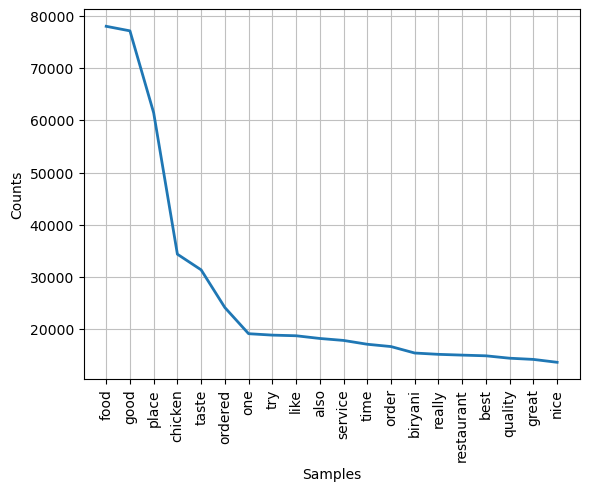

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [69]:
fd.plot(20) #most used 20 words in comments in quick bites restaurants

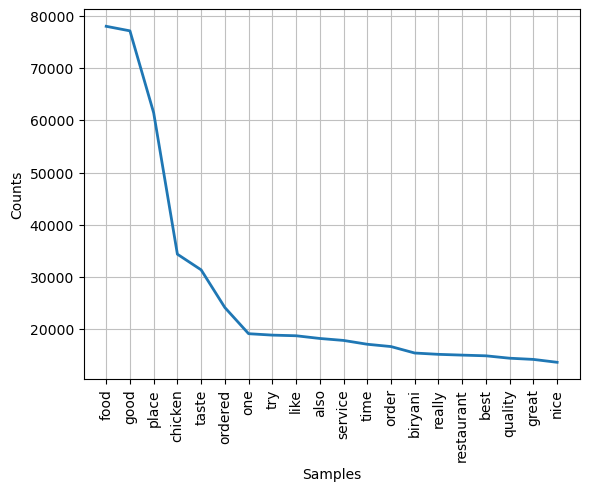

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [70]:
fd.plot(20)

# Bigram/Trigram

In [71]:
from nltk import bigrams, trigrams

In [72]:
bi_grams = bigrams(list_1d_tokens)

In [73]:
bi_grams

<generator object bigrams at 0x7fb81447b900>

In [74]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [75]:
fd_bigrams.most_common(20)

[(('must', 'try'), 5448),
 (('good', 'food'), 5340),
 (('food', 'good'), 5135),
 (('north', 'indian'), 4296),
 (('really', 'good'), 4102),
 (('pocket', 'friendly'), 3840),
 (('taste', 'good'), 3762),
 (('south', 'indian'), 3733),
 (('good', 'place'), 3715),
 (('value', 'money'), 3109),
 (('fried', 'rice'), 3051),
 (('good', 'taste'), 2922),
 (('quality', 'food'), 2857),
 (('one', 'best'), 2690),
 (('also', 'good'), 2673),
 (('visit', 'place'), 2577),
 (('chicken', 'biryani'), 2439),
 (('non', 'veg'), 2420),
 (('indian', 'food'), 2351),
 (('ordered', 'chicken'), 2304)]

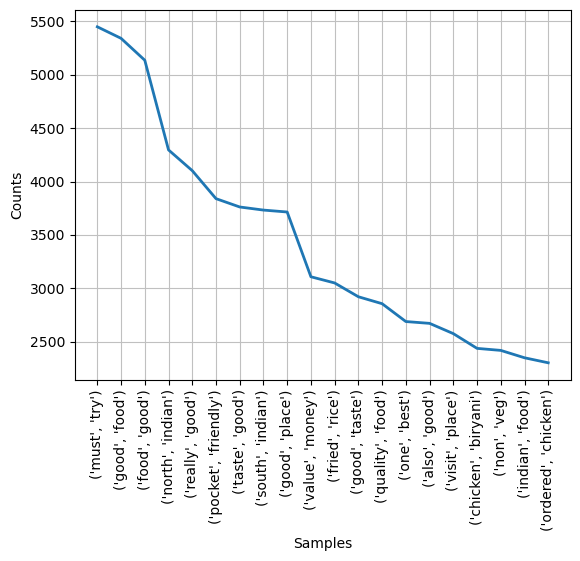

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [76]:
fd_bigrams.plot(20) ##most used 20 word-pairs in comments in quick bites restaurants

In [77]:
fd_bigrams.most_common(100)

[(('must', 'try'), 5448),
 (('good', 'food'), 5340),
 (('food', 'good'), 5135),
 (('north', 'indian'), 4296),
 (('really', 'good'), 4102),
 (('pocket', 'friendly'), 3840),
 (('taste', 'good'), 3762),
 (('south', 'indian'), 3733),
 (('good', 'place'), 3715),
 (('value', 'money'), 3109),
 (('fried', 'rice'), 3051),
 (('good', 'taste'), 2922),
 (('quality', 'food'), 2857),
 (('one', 'best'), 2690),
 (('also', 'good'), 2673),
 (('visit', 'place'), 2577),
 (('chicken', 'biryani'), 2439),
 (('non', 'veg'), 2420),
 (('indian', 'food'), 2351),
 (('ordered', 'chicken'), 2304),
 (('masala', 'dosa'), 2277),
 (('good', 'good'), 2231),
 (('food', 'quality'), 2091),
 (('small', 'place'), 2074),
 (('home', 'delivery'), 2009),
 (('tasty', 'food'), 1967),
 (('nice', 'place'), 1929),
 (('good', 'service'), 1828),
 (('best', 'place'), 1767),
 (('must', 'visit'), 1759),
 (('great', 'place'), 1660),
 (('take', 'away'), 1606),
 (('quantity', 'less'), 1591),
 (('first', 'time'), 1516),
 (('worst', 'food'), 1

In [78]:
tri_grams = trigrams(list_1d_tokens)

In [79]:
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [80]:
fd_trigrams.most_common(20)

[(('north', 'indian', 'food'), 1343),
 (('south', 'indian', 'food'), 824),
 (('paneer', 'butter', 'masala'), 821),
 (('good', 'food', 'good'), 666),
 (('chicken', 'fried', 'rice'), 568),
 (('must', 'visit', 'place'), 563),
 (('ordered', 'chicken', 'biryani'), 555),
 (('worst', 'food', 'ever'), 536),
 (('veg', 'non', 'veg'), 451),
 (('pocket', 'friendly', 'place'), 436),
 (('good', 'value', 'money'), 412),
 (('like', 'home', 'made'), 401),
 (('home', 'made', 'food'), 385),
 (('must', 'try', 'place'), 376),
 (('food', 'really', 'good'), 362),
 (('south', 'indian', 'breakfast'), 355),
 (('good', 'quality', 'food'), 346),
 (('north', 'indian', 'dishes'), 341),
 (('food', 'reasonable', 'price'), 323),
 (('food', 'quality', 'good'), 315)]

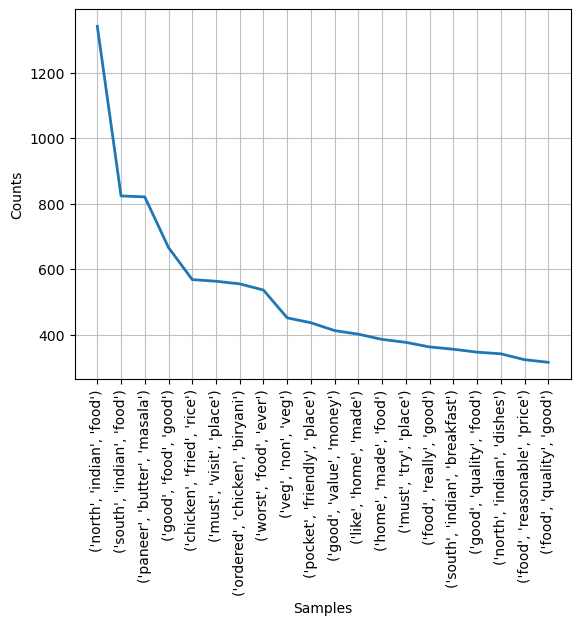

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [81]:
fd_trigrams.plot(20) ##most used 20 word-trios in comments in quick bites restaurants

# Restaurant locations in folium map 

In [82]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [84]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [85]:
df['location'][0]

'Banashankari'

In [86]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [87]:
#suggested step for more accurate locations

df['location'] = df['location'] + " , Bangalore  , Karnataka , India "

In [88]:
df['location'][0]

'Banashankari , Bangalore  , Karnataka , India '

In [89]:
df_copy = df.copy()

In [90]:
df_copy = df_copy.dropna(subset = ['location'])

In [91]:
locations = pd.DataFrame(df_copy['location'].unique())

In [92]:
locations

0
0      Banashankari , Bangalore  , Karnataka , India 
1      Basavanagudi , Bangalore  , Karnataka , India 
2       Mysore Road , Bangalore  , Karnataka , India 
3         Jayanagar , Bangalore  , Karnataka , India 
4   Kumaraswamy Layout , Bangalore  , Karnataka , ...
..                                                ...
88   West Bangalore , Bangalore  , Karnataka , India 
89      Magadi Road , Bangalore  , Karnataka , India 
90        Yelahanka , Bangalore  , Karnataka , India 
91   Sahakara Nagar , Bangalore  , Karnataka , India 
92           Peenya , Bangalore  , Karnataka , India 

[93 rows x 1 columns]

In [93]:
locations.columns = ['loc_name']

In [94]:
locations

loc_name
0      Banashankari , Bangalore  , Karnataka , India 
1      Basavanagudi , Bangalore  , Karnataka , India 
2       Mysore Road , Bangalore  , Karnataka , India 
3         Jayanagar , Bangalore  , Karnataka , India 
4   Kumaraswamy Layout , Bangalore  , Karnataka , ...
..                                                ...
88   West Bangalore , Bangalore  , Karnataka , India 
89      Magadi Road , Bangalore  , Karnataka , India 
90        Yelahanka , Bangalore  , Karnataka , India 
91   Sahakara Nagar , Bangalore  , Karnataka , India 
92           Peenya , Bangalore  , Karnataka , India 

[93 rows x 1 columns]

In [95]:
from geopy.geocoders import Nominatim

In [96]:
geolocator = Nominatim(user_agent="app")

In [97]:
lat = []
lon = []

for location in locations['loc_name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [98]:
locations['latitude'] = lat
locations['longitude'] = lon

In [99]:
locations

loc_name   latitude  longitude
0      Banashankari , Bangalore  , Karnataka , India   12.915219  77.573621
1      Basavanagudi , Bangalore  , Karnataka , India   12.941726  77.575502
2       Mysore Road , Bangalore  , Karnataka , India   12.946662  77.530090
3         Jayanagar , Bangalore  , Karnataka , India   12.929273  77.582423
4   Kumaraswamy Layout , Bangalore  , Karnataka , ...  12.908149  77.555318
..                                                ...        ...        ...
88   West Bangalore , Bangalore  , Karnataka , India   13.022235  77.567183
89      Magadi Road , Bangalore  , Karnataka , India   12.975608  77.555356
90        Yelahanka , Bangalore  , Karnataka , India   13.100698  77.596345
91   Sahakara Nagar , Bangalore  , Karnataka , India   13.062147  77.580061
92           Peenya , Bangalore  , Karnataka , India   13.032942  77.527325

[93 rows x 3 columns]

In [100]:
locations.isnull().sum()

loc_name     0
latitude     2
longitude    2
dtype: int64

In [101]:
locations[locations['latitude'].isna()]

loc_name  latitude  longitude
79  Rammurthy Nagar , Bangalore  , Karnataka , India        NaN        NaN
85   Sadashiv Nagar , Bangalore  , Karnataka , India        NaN        NaN

In [102]:
#googled the data

locations['latitude'][45]= 12.9764122
locations['longitude'][45] = 77.6017437

/var/folders/p4/_ylldw792tx5lq22msk41v500000gn/T/ipykernel_82673/3533035757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['latitude'][45]= 12.9764122
/var/folders/p4/_ylldw792tx5lq22msk41v500000gn/T/ipykernel_82673/3533035757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['longitude'][45] = 77.6017437


In [103]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

/var/folders/p4/_ylldw792tx5lq22msk41v500000gn/T/ipykernel_82673/3574854389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['latitude'][79] = 13.0163
/var/folders/p4/_ylldw792tx5lq22msk41v500000gn/T/ipykernel_82673/3574854389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['longitude'][79] = 77.6785
/var/folders/p4/_ylldw792tx5lq22msk41v500000gn/T/ipykernel_82673/3574854389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [104]:
locations[locations['latitude'].isna()]

Empty DataFrame
Columns: [loc_name, latitude, longitude]
Index: []

In [105]:
df['cuisines'].isnull().sum()

45

In [106]:
df = df.dropna(subset = ['cuisines'])
df

index                                                url  \
0          0  https://www.zomato.com/bangalore/jalsa-banasha...   
1          1  https://www.zomato.com/bangalore/spice-elephan...   
2          2  https://www.zomato.com/SanchurroBangalore?cont...   
3          3  https://www.zomato.com/bangalore/addhuri-udupi...   
4          4  https://www.zomato.com/bangalore/grand-village...   
...      ...                                                ...   
51712  51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                             phone  \
0            Yes   4.1    775    080 42297555\r\n+91 9743772233   
1             No   4.1    787                      080 41714161   
2             No   3.8    918                    +91 9663487993   
3             No   3.7     88                    +91 9620009302   
4             No   3.8    166  +91 8026612447\r\n+91 9901210005   
...          ...   ...    ...                               ...   
51712         No   3.6     27                      080 40301477   
51713         No   NaN      0                    +91 8197675843   
51714         No   NaN      0                              None   
51715        Yes   4.3    236                      080 49652769   
51716         No   3.4     13                    +91 8071117272   

                                                location            rest_type  \
0         Banashankari , Bangalore  , Karnataka , India         Casual Dining   
1         Banashankari , Bangalore  , Karnataka , India         Casual Dining   
2         Banashankari , Bangalore  , Karnataka , India   Cafe, Casual Dining   
3         Banashankari , Bangalore  , Karnataka , India           Quick Bites   
4         Basavanagudi , Bangalore  , Karnataka , India         Casual Dining   
...                                                  ...                  ...   
51712       Whitefield , Bangalore  , Karnataka , India                   Bar   
51713       Whitefield , Bangalore  , Karnataka , India                   Bar   
51714       Whitefield , Bangalore  , Karnataka , India               

In [107]:
north_indian_df = df[df['cuisines'].str.contains('North Indian')]

In [108]:
north_indian_df

index                                                url  \
0          0  https://www.zomato.com/bangalore/jalsa-banasha...   
1          1  https://www.zomato.com/bangalore/spice-elephan...   
3          3  https://www.zomato.com/bangalore/addhuri-udupi...   
4          4  https://www.zomato.com/bangalore/grand-village...   
5          5  https://www.zomato.com/bangalore/timepass-dinn...   
...      ...                                                ...   
51706  51706  https://www.zomato.com/bangalore/red-glow-whit...   
51708  51708  https://www.zomato.com/bangalore/keys-cafe-key...   
51709  51709  https://www.zomato.com/bangalore/the-farm-hous...   
51711  51711  https://www.zomato.com/bangalore/bhagini-2-whi...   
51716  51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5      37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
...                                                  ...   
51706  Poornima Complex, Dodsworth Layout, Whitefield...   
51708  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
51709  136, SAP Labs India, KIADB Export Promotion In...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                               name online_order book_table  rate  votes  \
0                             Jalsa          Yes        Yes   4.1    775   
1                    Spice Elephant          Yes         No   4.1    787   
3             Addhuri Udupi Bhojana           No         No   3.7     88   
4                     Grand Village           No         No   3.8    166   
5                   Timepass Dinner          Yes         No   3.8    286   
...                             ...          ...        ...   ...    ...   
51706                      Red Glow           No         No   3.7     27   
51708        Keys Cafe - Keys Hotel           No         No   2.8    161   
51709    The Farm House Bar n Grill           No         No   3.7     34   
51711                       Bhagini           No         No   2.5     81   
51716  The Nest - The Den Bengaluru           No         No   3.4     13   

                                  phone  \
0        080 42297555\r\n+91 9743772233   
1                          080 41714161   
3                        +91 9620009302   
4      +91 8026612447\r\n+91 9901210005   
5      +91 9980040002\r\n+91 9980063005   
...                                 ...   
51706                    +91 9740571131   
51708      080 39451000\n+91 8884038484   
51709    +91 9980121279\n+91 9900240646   
51711                      080 65951222   
51716                    +91 8071117272   

                                                location           rest_type  \
0         Banashankari , Bangalore  , Karnataka , India        Casual Dining   
1         Banashankari , Bangalore  , Karnataka , India        Casual Dining   
3         Banashankari , Bangalore  , Karnataka , India          Quick Bites   
4         Basavanagudi , Bangalore  , Karnataka , India        Casual Dining   
5         Basavanagudi , Bangalore  , Karnataka , India        Casual Dining   
...                                                  ...                 ...   
51706       Whitefield , Bangalore  , Karnataka , India                  Pub   
51708       Whitefield , Bangalore  , Karnataka , India   Casual Dining, Bar   
51709       Whitefield , Bangalore  , Karnataka , India   Casual Dining, Bar   
51711       Whitefield , Bangalore  , Karnataka , India   Casual Dining, Bar   
51716  ITPL Main Road, Whitefield , Bangalore  , Karn...  Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Ma

In [109]:
nort_ind_rest = north_indian_df['location'].value_counts().reset_index().rename(columns = {'index':'loc_name','location':'count'})
nort_ind_rest

loc_name  count
0               BTM , Bangalore  , Karnataka , India    2469
1               HSR , Bangalore  , Karnataka , India    1123
2        Whitefield , Bangalore  , Karnataka , India    1059
3      Marathahalli , Bangalore  , Karnataka , India    1038
4          JP Nagar , Bangalore  , Karnataka , India     958
..                                                ...    ...
85           Hebbal , Bangalore  , Karnataka , India       4
86           Jakkur , Bangalore  , Karnataka , India       3
87  Central Bangalore , Bangalore  , Karnataka , I...      2
88   West Bangalore , Bangalore  , Karnataka , India       1
89           Peenya , Bangalore  , Karnataka , India       1

[90 rows x 2 columns]

In [110]:
locations

loc_name   latitude  longitude
0      Banashankari , Bangalore  , Karnataka , India   12.915219  77.573621
1      Basavanagudi , Bangalore  , Karnataka , India   12.941726  77.575502
2       Mysore Road , Bangalore  , Karnataka , India   12.946662  77.530090
3         Jayanagar , Bangalore  , Karnataka , India   12.929273  77.582423
4   Kumaraswamy Layout , Bangalore  , Karnataka , ...  12.908149  77.555318
..                                                ...        ...        ...
88   West Bangalore , Bangalore  , Karnataka , India   13.022235  77.567183
89      Magadi Road , Bangalore  , Karnataka , India   12.975608  77.555356
90        Yelahanka , Bangalore  , Karnataka , India   13.100698  77.596345
91   Sahakara Nagar , Bangalore  , Karnataka , India   13.062147  77.580061
92           Peenya , Bangalore  , Karnataka , India   13.032942  77.527325

[93 rows x 3 columns]

In [111]:
merged_df = nort_ind_rest.merge(locations, on='loc_name', how = 'left')

In [112]:
merged_df

loc_name  count   latitude  \
0               BTM , Bangalore  , Karnataka , India    2469  12.911276   
1               HSR , Bangalore  , Karnataka , India    1123  12.911623   
2        Whitefield , Bangalore  , Karnataka , India    1059  12.969637   
3      Marathahalli , Bangalore  , Karnataka , India    1038  12.955257   
4          JP Nagar , Bangalore  , Karnataka , India     958  12.912076   
..                                                ...    ...        ...   
85           Hebbal , Bangalore  , Karnataka , India       4  13.038218   
86           Jakkur , Bangalore  , Karnataka , India       3  13.078474   
87  Central Bangalore , Bangalore  , Karnataka , I...      2  13.035992   
88   West Bangalore , Bangalore  , Karnataka , India       1  13.022235   
89           Peenya , Bangalore  , Karnataka , India       1  13.032942   

    longitude  
0   77.604565  
1   77.638862  
2   77.749745  
3   77.698416  
4   77.579393  
..        ...  
85  77.591900  
86  77.606894  
87  77.574969  
88  77.567183  
89  77.527325  

[90 rows x 4 columns]

In [113]:
import folium

In [114]:
basemap = folium.Map()

In [115]:
basemap

In [116]:
from folium.plugins import HeatMap

In [117]:
HeatMap(merged_df[['latitude','longitude','count']]).add_to(basemap)

In [118]:
basemap

In [119]:
# heat supposed to be around India, apparently, some of the data is from other places

In [120]:
def get_heat_map(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    cuis_rest = cuisine_df['location'].value_counts().reset_index().rename(columns = {'index':'loc_name','location':'count'})
    
    merged_df = cuis_rest.merge(locations, on='loc_name', how = 'left') 
    print(merged_df.head())
    
    basemap = folium.Map()
    HeatMap(merged_df[['latitude','longitude','count']]).add_to(basemap)
    return basemap

In [121]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [122]:
get_heat_map('Mexican')

                                            loc_name  count   latitude  \
0      Indiranagar , Bangalore  , Karnataka , India      42  12.973291   
1           Ulsoor , Bangalore  , Karnataka , India      35  12.977879   
2  Koramangala 7th Block , Bangalore  , Karnataka...     34  12.936485   
3     Banashankari , Bangalore  , Karnataka , India      32  12.915219   
4  Koramangala 5th Block , Bangalore  , Karnataka...     32  12.934843   

   longitude  
0  77.640467  
1  77.624670  
2  77.613478  
3  77.573621  
4  77.618977  


In [123]:
get_heat_map('Italian')

                                            loc_name  count   latitude  \
0  Koramangala 5th Block , Bangalore  , Karnataka...    220  12.934843   
1      Indiranagar , Bangalore  , Karnataka , India     209  12.973291   
2  Koramangala 4th Block , Bangalore  , Karnataka...    187  12.932778   
3         JP Nagar , Bangalore  , Karnataka , India     185  12.912076   
4              HSR , Bangalore  , Karnataka , India     161  12.911623   

   longitude  
0  77.618977  
1  77.640467  
2  77.629405  
3  77.579393  
4  77.638862  
